In [2]:
source('helpers.R')
source('../utils.R')

loadLibraries()
x = loadData()

In [3]:
df.combined =  x$combined %>% 
    mutate(MSSubClass = as.character(MSSubClass), 
           YearBuiltChar = as.character(YearBuilt),
           LotAreaSqrt = sqrt(LotArea),
           LotAreaLog = log(LotFrontage),
           LotShape2=ifelse(LotShape == 'Reg', 'Reg', 'Ireg')
    )

df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage.na = df.combined %>% filter(is.na(LotFrontage))
df.lot_frontage.cutted = df.lot_frontage %>% filter(LotFrontage < 130)

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)

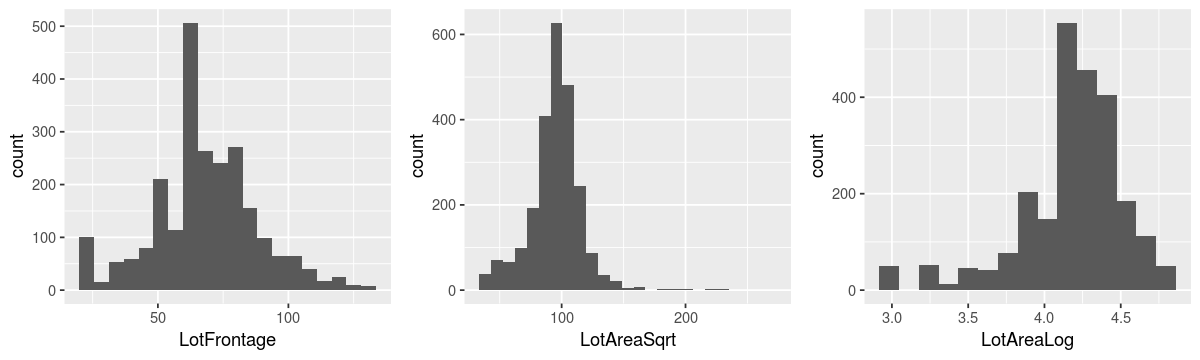

In [6]:
options(repr.plot.width = 10, repr.plot.height = 3)

g1 = ggplot(df.lot_frontage.cutted, aes(x = LotFrontage)) + geom_histogram(bins = 20)
g2 = ggplot(df.lot_frontage.cutted, aes(x = LotAreaSqrt)) + geom_histogram(bins = 25)
g3 = ggplot(df.lot_frontage.cutted, aes(x = LotAreaLog)) + geom_histogram(bins = 15)

grid.arrange(g1, g2, g3, layout_matrix=rbind(c(1, 2, 3)))

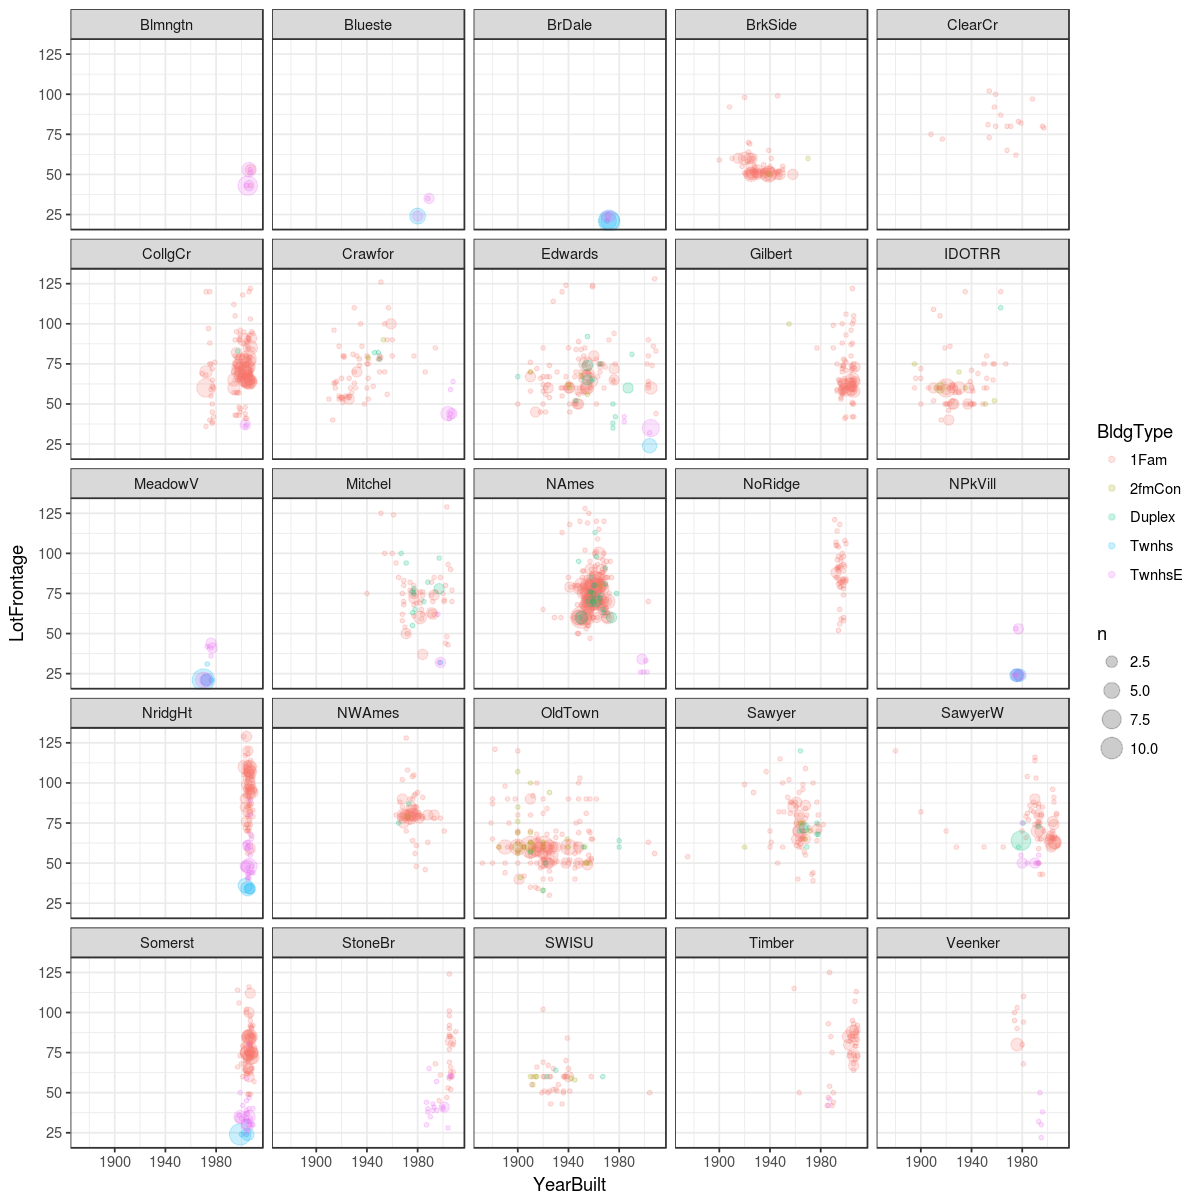

In [7]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df.lot_frontage.cutted, aes(x=YearBuilt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.2) +
    facet_wrap(~Neighborhood) +
    theme_bw()

# Blmngtn

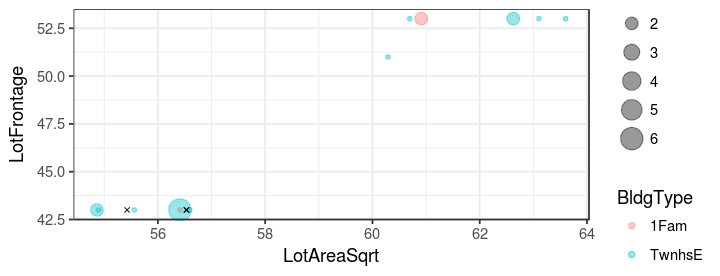

In [4]:
options(repr.plot.width = 6, repr.plot.height = 2.3)

source("lot_frontage_fix_na.R")

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.train = FixNaLotFrontage.Blmngtn(df.train)

ggplot() +
    geom_count(data = df.lot_frontage %>% 
                      filter(Neighborhood == 'Blmngtn'), 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data = df.train %>% 
                       filter(Neighborhood == 'Blmngtn') %>% 
                       filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=0.8, shape=4, size=1) +
    theme_bw()

In [6]:
df.train %>% 
    filter(Neighborhood == 'Blmngtn', is.na(LotFrontage)) %>%
    select(LotFrontage, LotFrontageCalc, LotAreaSqrt, BldgType)

LotFrontage,LotFrontageCalc,LotAreaSqrt,BldgType
NA,43,55.42563,TwnhsE
NA,43,56.53318,TwnhsE
NA,43,56.53318,TwnhsE


# Blueste

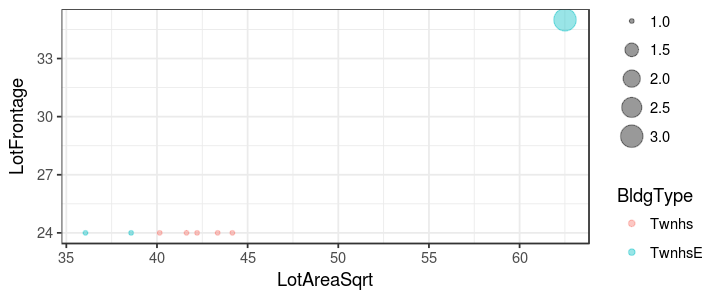

In [24]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Blueste'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.4) +
    theme_bw()

In [15]:
df.train %>% 
    filter(Neighborhood == 'Blueste') %>%
    select(LotFrontage, LotAreaSqrt, BldgType)

LotFrontage,LotAreaSqrt,BldgType
24,44.15880,Twnhs
24,36.05551,TwnhsE


# BrDale

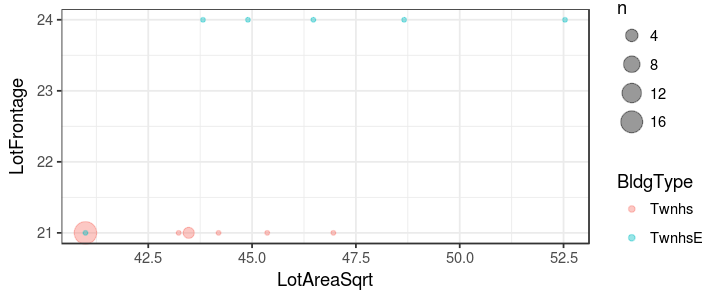

In [16]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'BrDale'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.4) +
    theme_bw()

In [17]:
df.train %>% 
    filter(Neighborhood == 'BrDale') %>%
    select(LotFrontage, LotAreaSqrt, BldgType)

LotFrontage,LotAreaSqrt,BldgType
21,40.98780,Twnhs
21,43.23193,Twnhs
21,40.98780,Twnhs
21,40.98780,TwnhsE
21,40.98780,Twnhs
21,40.98780,Twnhs
24,43.81780,TwnhsE
21,43.47413,Twnhs
21,40.98780,Twnhs
21,40.98780,Twnhs


# BrkSide

In [8]:
options(repr.plot.width = 9, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.BrkSide = df.lot_frontage %>% filter(Neighborhood == 'BrkSide')

df.train = FixNaLotFrontage.BrkSide(
        df.train = df.train, 
        df.data = df.BrkSide
)

ggplot() +
    geom_count(data=df.BrkSide, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'BrkSide') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
     facet_wrap(~MSZoning) +
     theme_bw()

ERROR: Error in filter_impl(.data, quo): Argument 2 filter condition does not evaluate to a logical vector


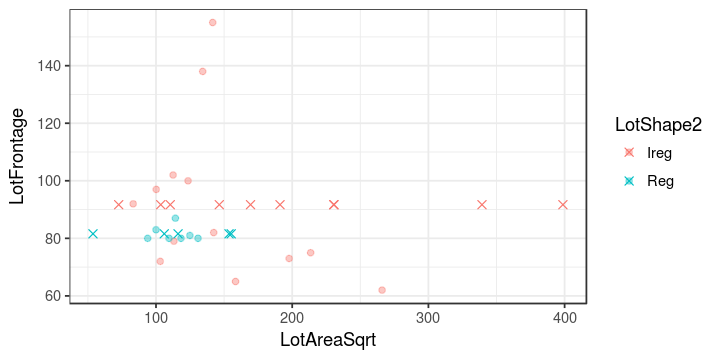

In [56]:
options(repr.plot.width = 6, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.data.ClearCr = df.lot_frontage %>% filter(Neighborhood == 'ClearCr')
df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)

df.train = FixNaLotFrontage.ClearCr(df.train, df.data.ClearCr)

ggplot() +
    geom_point(data = df.data.ClearCr, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotShape2), 
               alpha=0.4) +
    geom_point(data = df.train %>% 
                       filter(Neighborhood == 'ClearCr') %>% 
                       filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc, colour=LotShape2),
               alpha=1, shape=4, size=2) +
    theme_bw()

In [28]:
df.train %>% 
    filter(Neighborhood == 'ClearCr' & is.na(LotFrontage)) %>%
    select(LotFrontage, LotFrontageCalc, LotAreaSqrt, LotShape, LotShape2)

LotFrontage,LotFrontageCalc,LotAreaSqrt,LotShape,LotShape2
NA,88.84211,146.46843,IR1,Reg
NA,88.84211,116.18950,Reg,Reg
NA,88.84211,103.47947,IR1,Reg
NA,75.00000,398.74804,IR2,Ireg
NA,88.84211,72.60165,IR1,Reg
NA,75.00000,230.44956,IR2,Ireg
NA,88.84211,230.70977,IR1,Reg
NA,88.84211,53.73081,Reg,Reg
NA,75.00000,339.33612,IR2,Ireg
NA,88.84211,110.47624,IR1,Reg


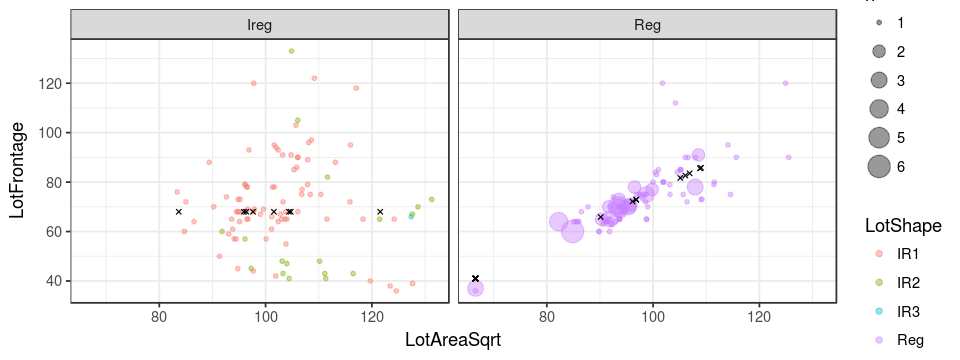

In [49]:
options(repr.plot.width = 8, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.CollgCr = df.lot_frontage %>% filter(Neighborhood == 'CollgCr')
df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)

df.train = FixNaLotFrontage.CollgCr(
        df.train = df.train, 
        df.data = df.CollgCr
)

ggplot() +
    geom_count(data=df.CollgCr, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotShape), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'CollgCr') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    facet_wrap(~LotShape2) +
    theme_bw()

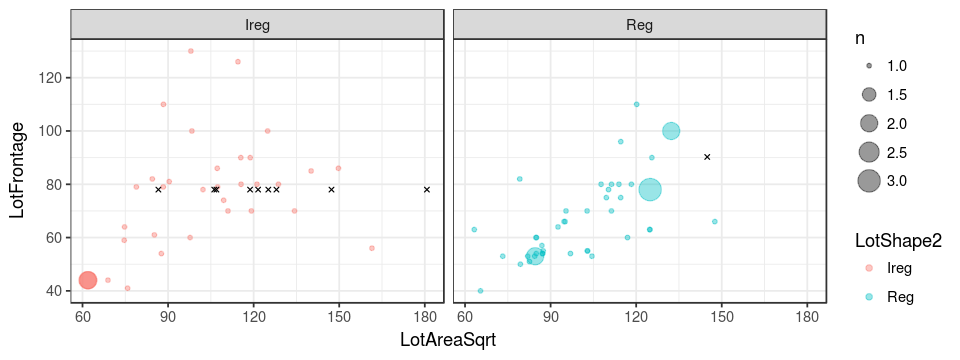

In [54]:
options(repr.plot.width = 8, repr.plot.height = 3)

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.Crawfor = df.lot_frontage %>% filter(Neighborhood == 'Crawfor') 

df.train = FixNaLotFrontage.Crawfor(df.train, df.Crawfor)

ggplot() +
    geom_count(data=df.data.Crawfor, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotShape2), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'Crawfor') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    facet_wrap(~LotShape2) +
    theme_bw()

In [13]:
options(repr.plot.width = 8, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.train = FixNaLotFrontage.Crawfor(
        df.train = df.train, 
        df.data = df.data.Crawfor
)

ggplot() +
    geom_count(data=df.Crawfor, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotShape), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'Crawfor') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
     facet_wrap(~LotShape2) +
     theme_bw()

ERROR: Error in fortify(data): object 'df.Crawfor' not found


In [24]:
df.train %>% 
    filter(Neighborhood == 'Crawfor' & is.na(LotFrontage)) %>%
    select(LotFrontage, LotFrontageCalc, LotAreaSqrt, LotShape)

LotFrontage,LotFrontageCalc,LotAreaSqrt,LotShape
NA,90.25384,144.91377,Reg
NA,84.51596,125.13992,IR1
NA,108.14961,180.74291,IR1
NA,93.93164,147.29223,IR1
NA,76.45879,106.18380,IR1
NA,82.99638,121.56480,IR1
NA,76.77790,106.93456,IR1
NA,81.79717,118.74342,IR1
NA,68.13592,86.60254,IR1
NA,85.72663,127.98828,IR1


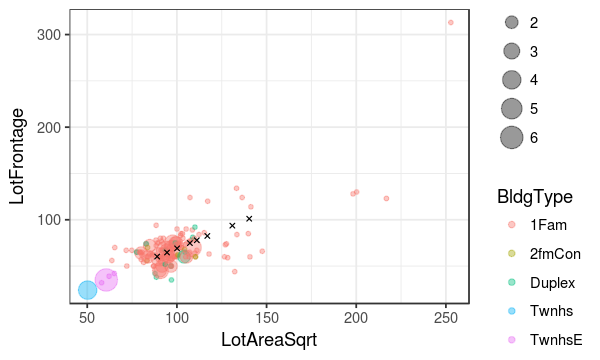

In [17]:
options(repr.plot.width = 5, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.data.Edwards = df.lot_frontage %>% filter(Neighborhood == 'Edwards')

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.train = FixNaLotFrontage.Edwards(
        df.train = df.train, 
        df.data = df.data.Edwards
)

ggplot() +
    geom_count(data=df.data.Edwards, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'Edwards') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

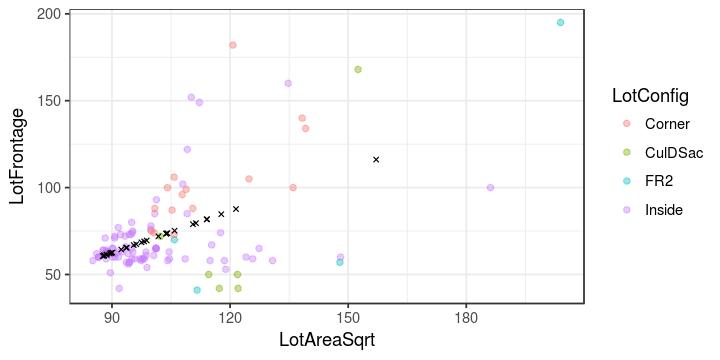

In [9]:
options(repr.plot.width = 6, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.data.Gilbert = df.lot_frontage %>% filter(Neighborhood == 'Gilbert')

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.train = FixNaLotFrontage.Gilbert(
        df.train = df.train, 
        df.data = df.data.Gilbert
)

ggplot() +
    geom_point(data=df.data.Gilbert, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotConfig), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'Gilbert') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

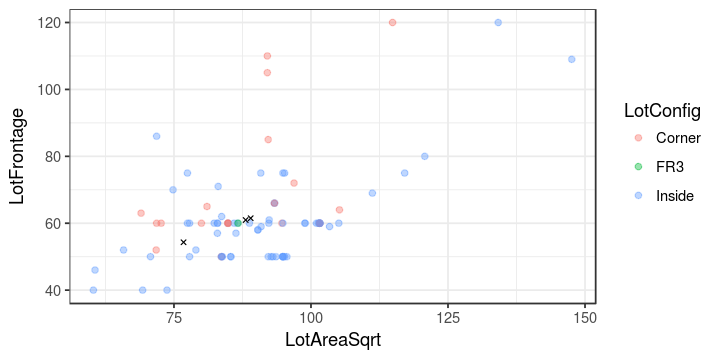

In [8]:
options(repr.plot.width = 6, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.data.IDOTRR = df.lot_frontage %>% filter(Neighborhood == 'IDOTRR')

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.train = FixNaLotFrontage.IDOTRR(
        df.train = df.train, 
        df.data = df.data.IDOTRR
)

ggplot() +
    geom_point(data=df.data.IDOTRR, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotConfig), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'IDOTRR') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

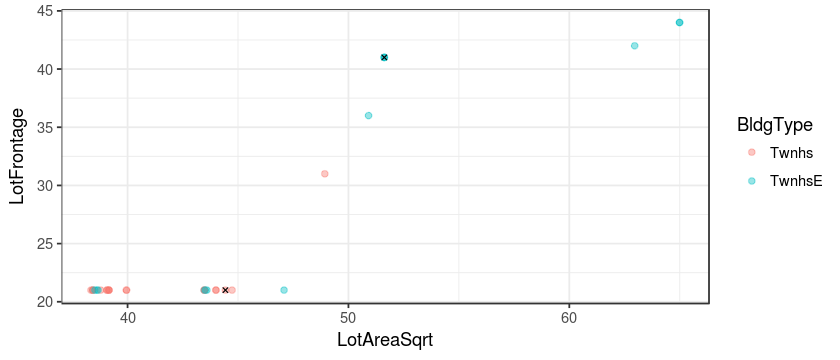

In [61]:
options(repr.plot.width = 7, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.data.MeadowV = df.lot_frontage %>% filter(Neighborhood == 'MeadowV')

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.train = FixNaLotFrontage.MeadowV(df.train = df.train)

ggplot() +
    geom_point(data=df.data.MeadowV, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'MeadowV') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

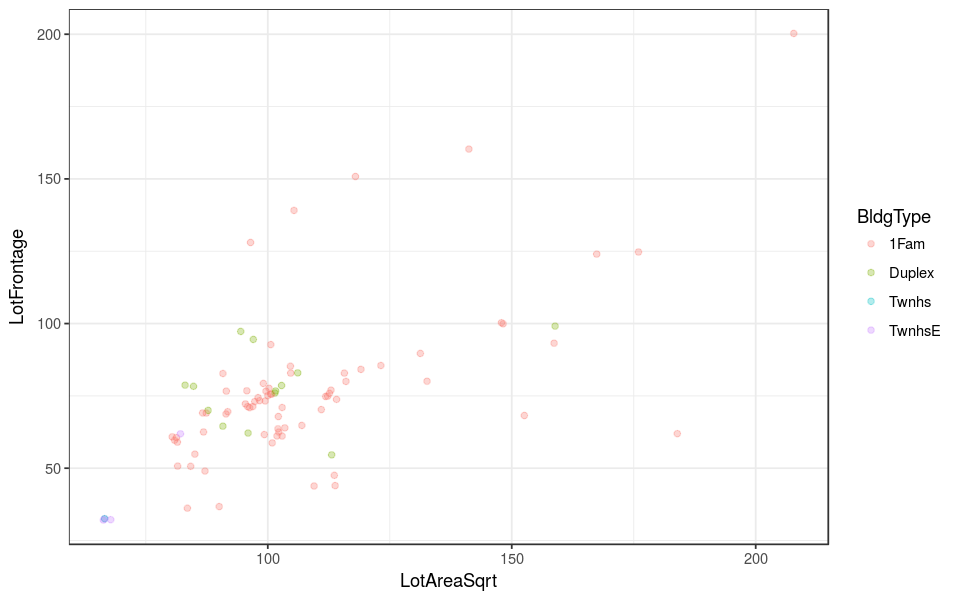

In [262]:
options(repr.plot.width = 8, repr.plot.height = 5)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Mitchel'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

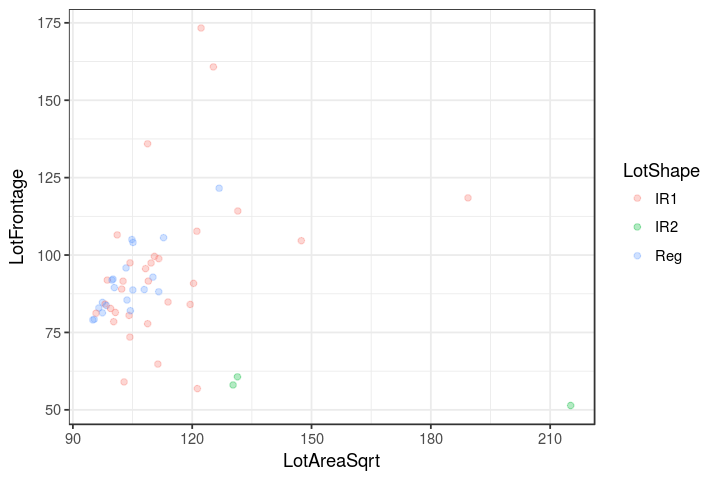

In [265]:
options(repr.plot.width = 6, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NoRidge'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotShape), alpha=0.3, width=1, height=1) +
    theme_bw()

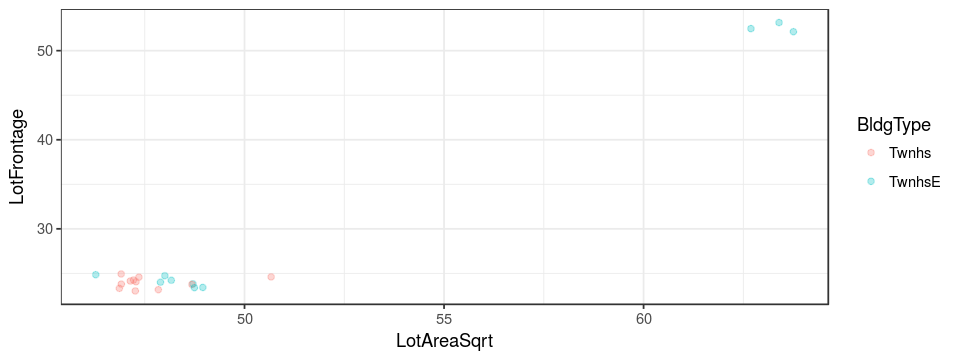

In [269]:
options(repr.plot.width = 8, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NPkVill'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

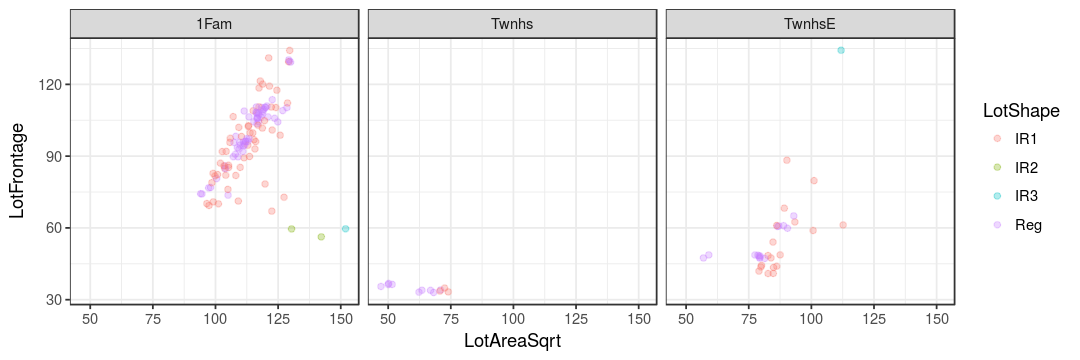

In [274]:
options(repr.plot.width = 9, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NridgHt'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotShape), alpha=0.3, width=1, height=1) +
    facet_wrap(~BldgType) +
    theme_bw()

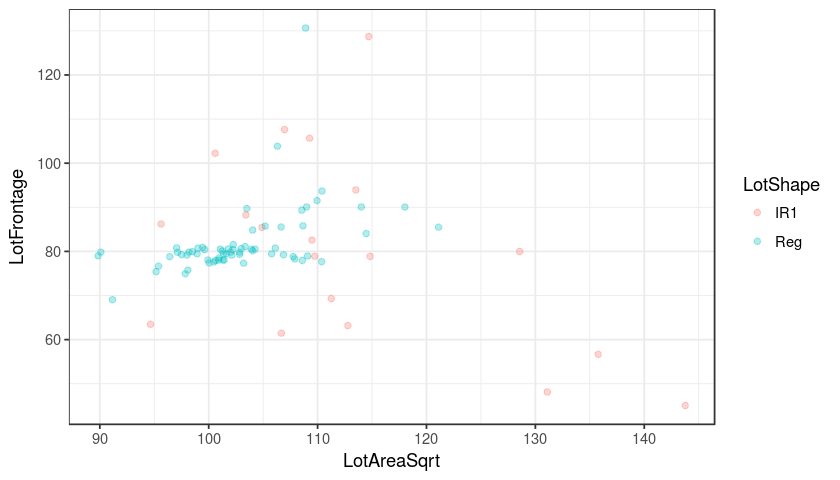

In [276]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NWAmes'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotShape), alpha=0.3, width=1, height=1) +
    theme_bw()

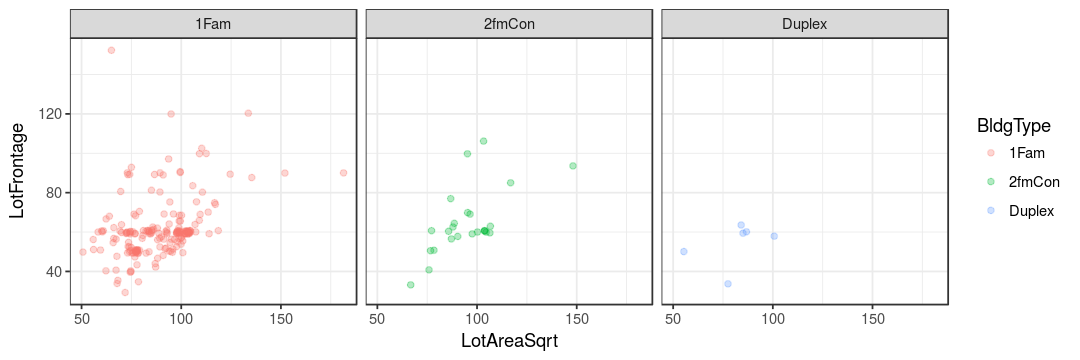

In [279]:
options(repr.plot.width = 9, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'OldTown'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    facet_wrap(~BldgType) +
    theme_bw()

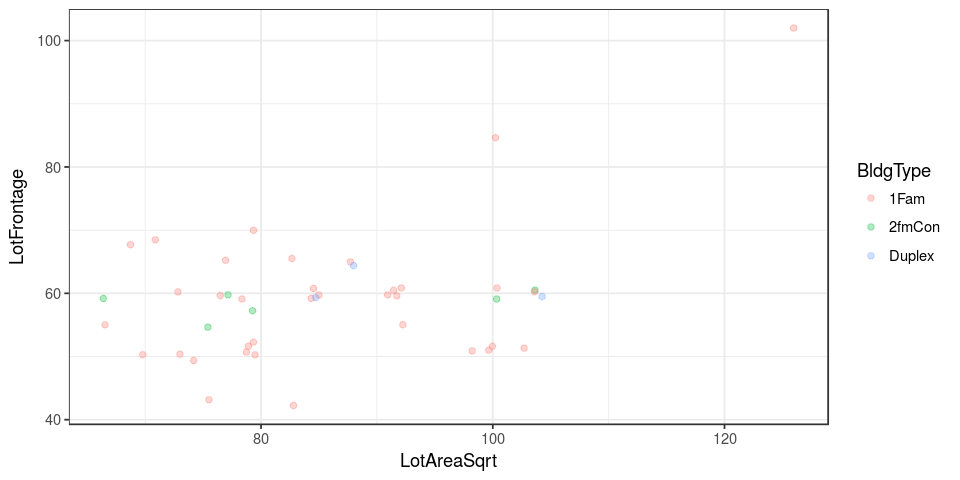

In [287]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'SWISU'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

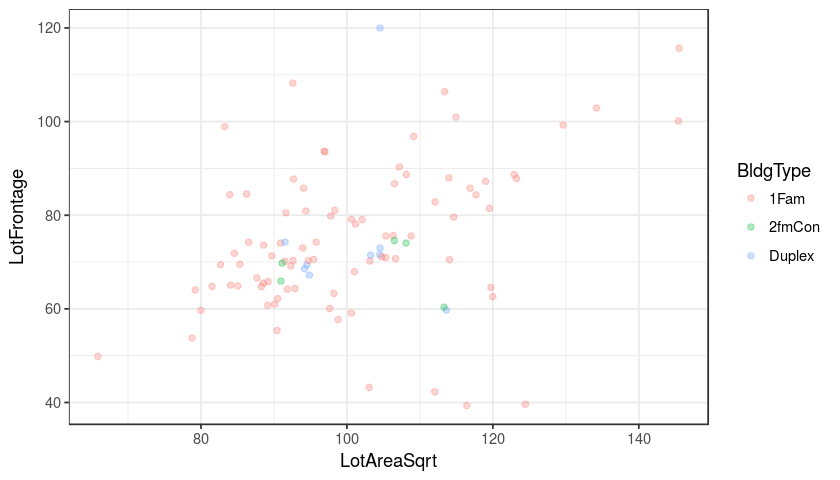

In [289]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Sawyer'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

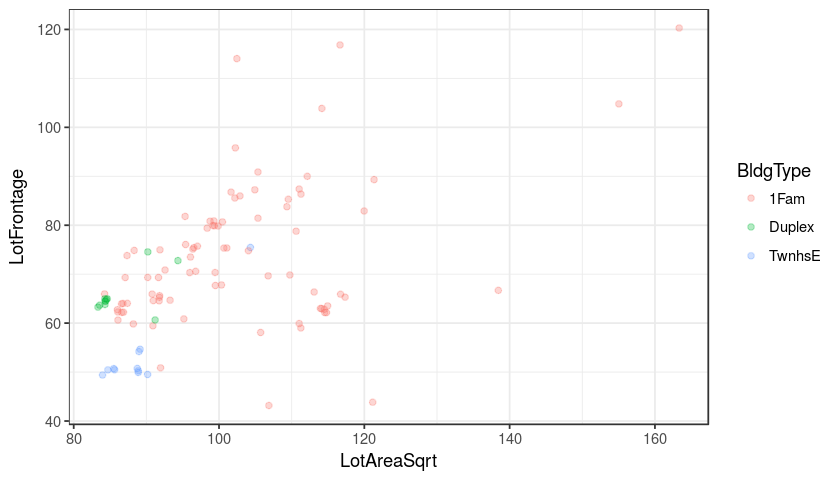

In [304]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'SawyerW'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

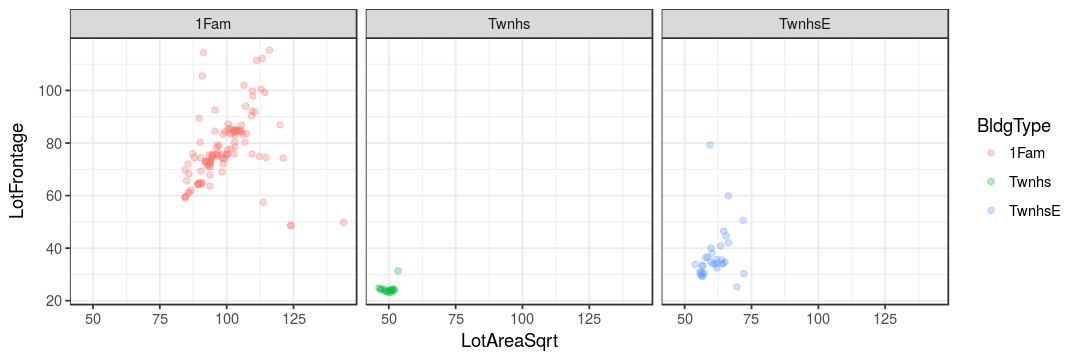

In [301]:
options(repr.plot.width = 9, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Somerst'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    facet_wrap(~BldgType) +
    theme_bw()

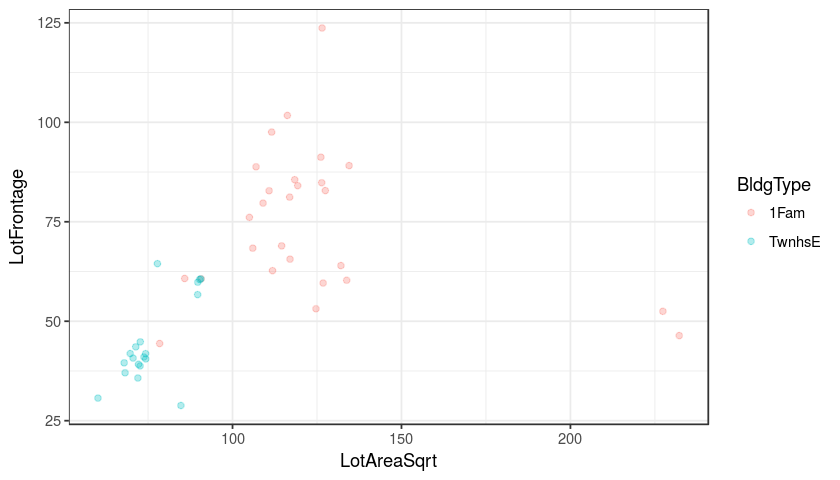

In [300]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'StoneBr'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

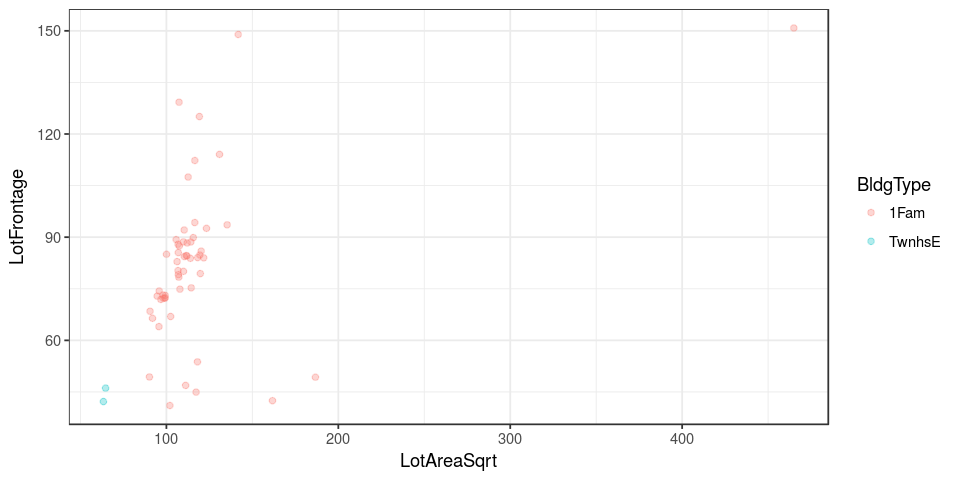

In [297]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Timber'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

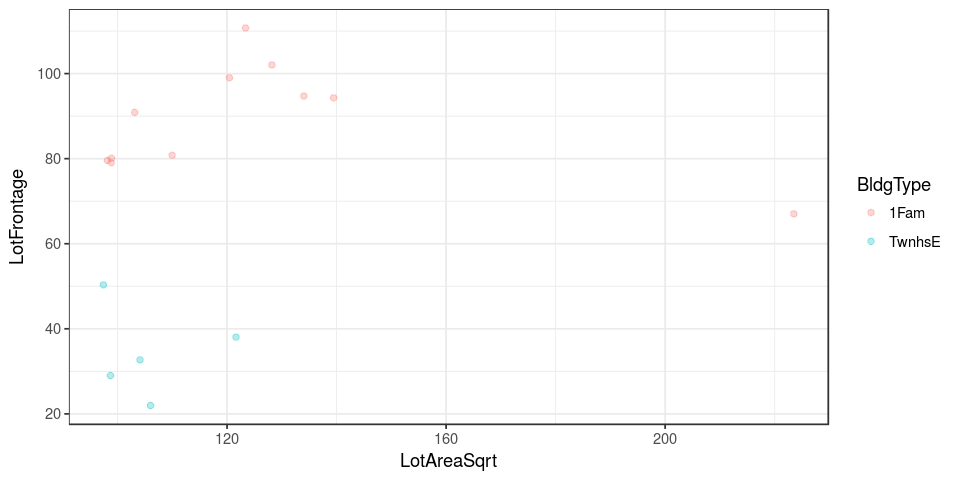

In [293]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Veenker'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()